In [140]:
# https://www.kaggle.com/arg0n007/titanic-80-accuracy-top-14-random-forest

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [141]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')
dataset_gd = dataset_test

In [142]:
dataset_train = pd.concat([dataset_test, dataset_train], axis=0)
dataset_train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298
5,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538
6,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972
7,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738
8,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657
9,21.0,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,NaN,A/4 48871


In [143]:
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [144]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [145]:
dataset_train.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [146]:
dataset_train["Fare"].fillna(dataset_train.Fare.mean(), inplace=True)

In [147]:
dataset_train.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [148]:
age_mean = dataset_train.Age.mean()
age_std = dataset_train.Age.std()
print("Age mean :",age_mean)
print("Age std :",age_std)

Age mean : 29.881137667304014
Age std : 14.413493211271321


In [149]:
dataset_train["Age"][dataset_train.Age.isnull()] = np.random.randint(high=age_mean + age_std, low=age_mean - age_std, size=len(dataset_train["Age"][dataset_train.Age.isnull()]))

In [150]:
dataset_train.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [151]:
age_mean = dataset_train.Age.mean()
age_std = dataset_train.Age.std()
print("Age mean :",age_mean)
print("Age std :",age_std)

Age mean : 29.73618792971734
Age std : 13.453401223991923


In [152]:
dataset_train.Embarked.fillna('n', inplace=True)

In [153]:
dataset_train['def_Cabin'] = dataset_train.Cabin.notnull().astype(int)
dataset_train['def_Cabin']

# null = 0, nonnull = 1

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     1
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     0
26     1
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    0
866    0
867    1
868    0
869    0
870    0
871    1
872    1
873    0
874    0
875    0
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: def_Cabin, Length: 1309, dtype: int64

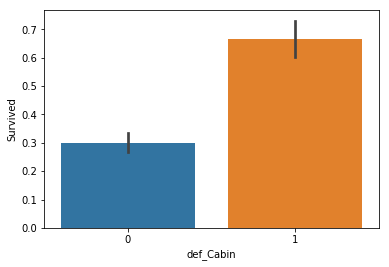

In [154]:
sns.barplot(data=dataset_train, x='def_Cabin', y='Survived')
plt.show()

In [155]:
dataset_train["Name_Length"] = dataset_train["Name"].apply(lambda x : len(x))

In [156]:
dataset_train["Name_Length"]

0      16
1      32
2      25
3      16
4      44
5      26
6      20
7      28
8      41
9      23
10     16
11     26
12     45
13     20
14     55
15     45
16     17
17     17
18     28
19     37
20     22
21     25
22     36
23     31
24     47
25     23
26     28
27     17
28     23
29     17
       ..
861    27
862    51
863    33
864    22
865    24
866    28
867    36
868    27
869    31
870    17
871    48
872    24
873    27
874    37
875    32
876    29
877    20
878    18
879    45
880    44
881    18
882    28
883    29
884    22
885    36
886    21
887    28
888    40
889    21
890    19
Name: Name_Length, Length: 1309, dtype: int64

In [157]:
dataset_train["Name_Length"] = ((dataset_train.Name_Length)/15).astype(np.int64)+1
dataset_train["Name_Length"]


0      2
1      3
2      2
3      2
4      3
5      2
6      2
7      2
8      3
9      2
10     2
11     2
12     4
13     2
14     4
15     4
16     2
17     2
18     2
19     3
20     2
21     2
22     3
23     3
24     4
25     2
26     2
27     2
28     2
29     2
      ..
861    2
862    4
863    3
864    2
865    2
866    2
867    3
868    2
869    3
870    2
871    4
872    2
873    2
874    3
875    3
876    2
877    2
878    2
879    4
880    3
881    2
882    2
883    2
884    2
885    3
886    2
887    2
888    3
889    2
890    2
Name: Name_Length, Length: 1309, dtype: int64

   Name_Length  Survived
0            1  0.428571
1            2  0.294400
2            3  0.533333
3            4  0.783333
4            5  1.000000
5            6  1.000000


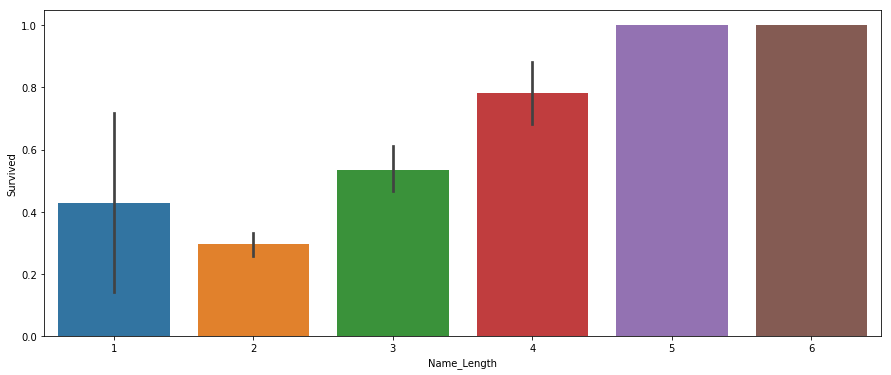

In [158]:
print(dataset_train[["Name_Length", "Survived"]].groupby(['Name_Length'], as_index = False).mean())
plt.subplots(figsize=(15, 6))
sns.barplot(data=dataset_train, x='Name_Length', y='Survived')

In [159]:
title = dataset_train.Name.values
title

array(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)',
       'Myles, Mr. Thomas Francis', ...,
       'Johnston, Miss. Catherine Helen "Carrie"',
       'Behr, Mr. Karl Howell', 'Dooley, Mr. Patrick'], dtype=object)

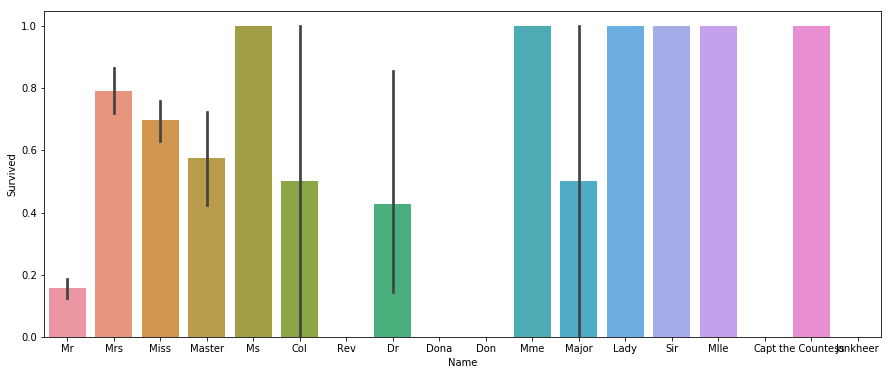

In [160]:
import re

for i in range(len(title)):
    r = re.search(', ([A-Za-z ]*)', title[i])
    title[i] = r.group(1)

dataset_train.loc[:, 'Name'] = title
plt.subplots(figsize=(15, 6))
sns.barplot(data=dataset_train, x='Name', y='Survived')

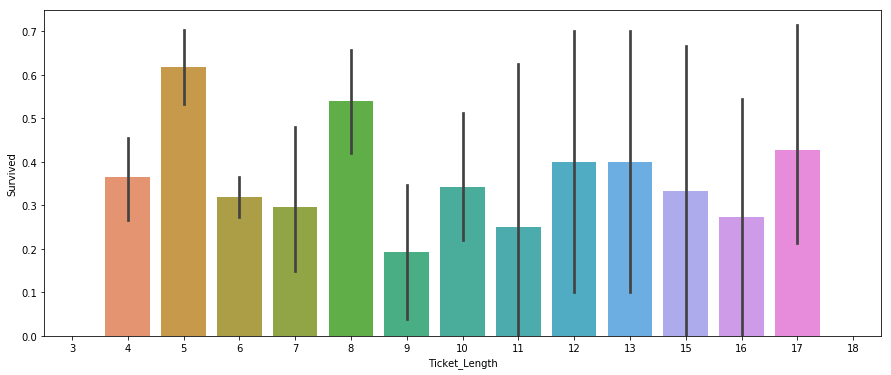

In [161]:
dataset_train['Ticket_Length'] = dataset_train['Ticket'].apply(lambda x : len(x))
plt.subplots(figsize=(15, 6))
sns.barplot(data=dataset_train, x='Ticket_Length', y='Survived')

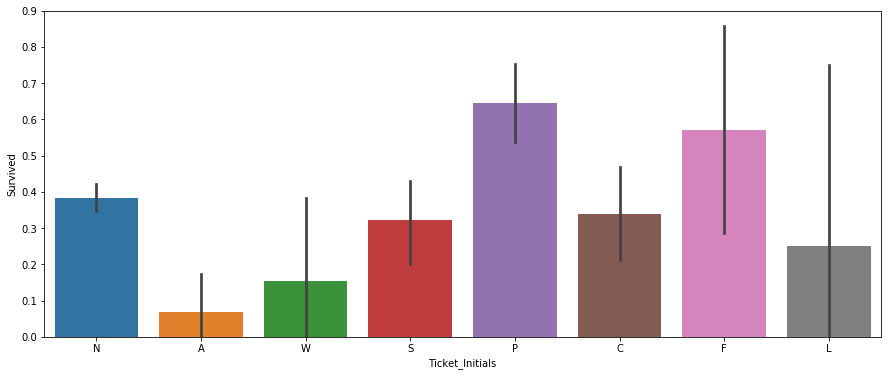

In [162]:
#  re.sub    https://uxmilk.jp/8662

dataset_train['Ticket_Initials'] = dataset_train['Ticket'].apply(lambda x : str(x)[0])
dataset_train['Ticket_Initials'] = dataset_train['Ticket_Initials'].apply(lambda x : re.sub('[0-9]', 'N', x))
plt.subplots(figsize=(15, 6))
sns.barplot(data=dataset_train, x='Ticket_Initials', y='Survived')


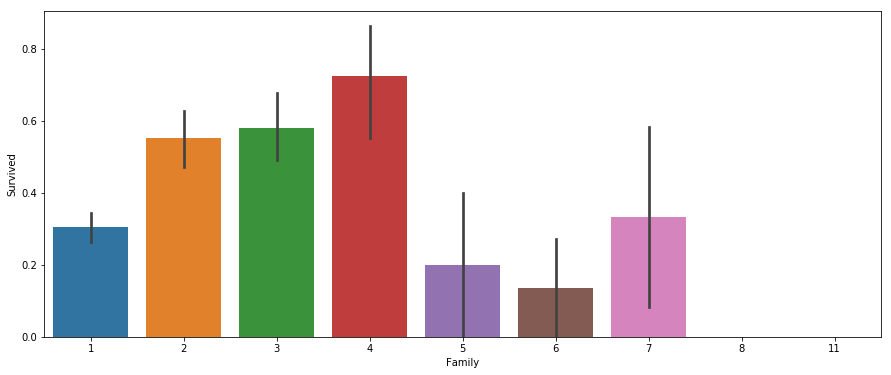

In [163]:
family = dataset_train.SibSp + dataset_train.Parch + 1
dataset_train['Family'] = family
plt.subplots(figsize=(15, 6))
sns.barplot(data=dataset_train, x='Family', y='Survived')

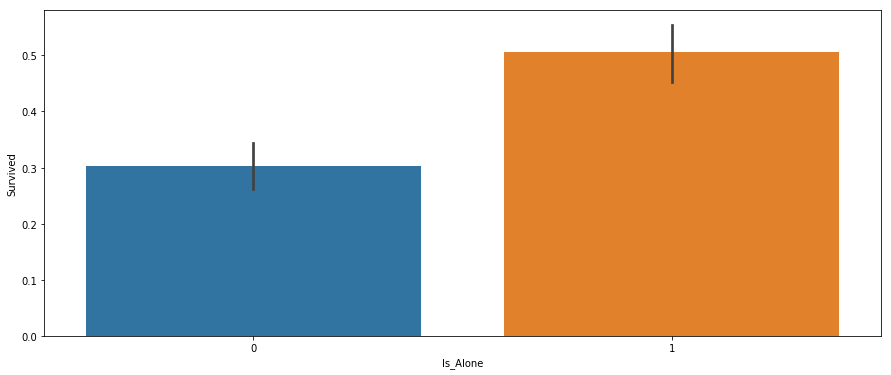

In [164]:
dataset_train['Is_Alone'] = dataset_train['Family'].apply(lambda x : 1 if x > 1 else 0)
plt.subplots(figsize=(15, 6))
sns.barplot(data=dataset_train, x='Is_Alone', y='Survived')


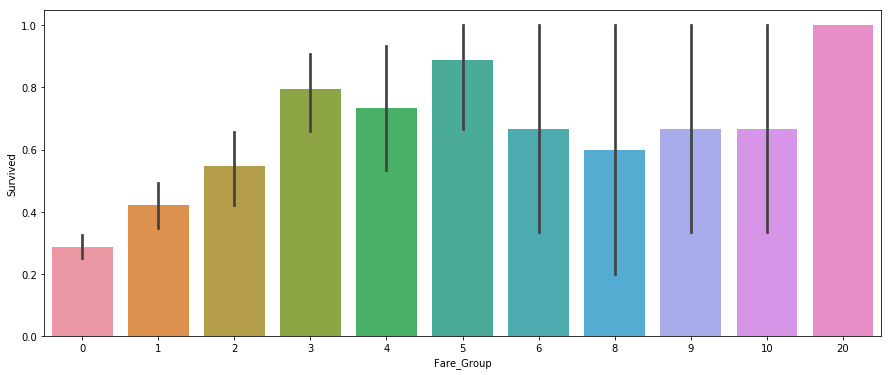

In [165]:
dataset_train['Fare_Group'] = (dataset_train['Fare']/25).values.astype(np.int64)
plt.subplots(figsize=(15, 6))
sns.barplot(data=dataset_train, x='Fare_Group', y='Survived')



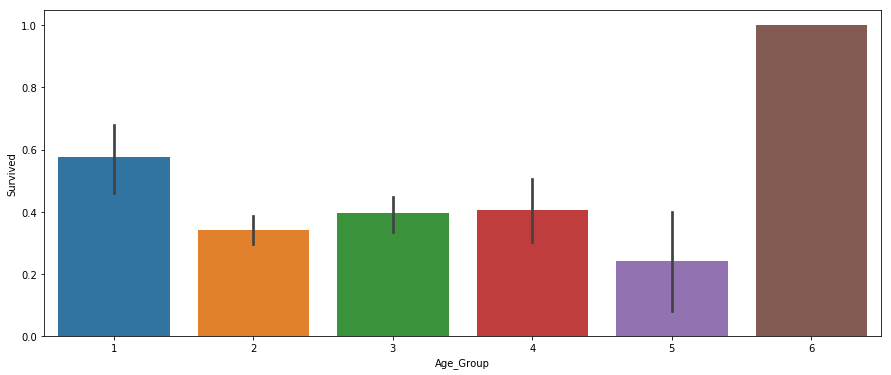

In [166]:
dataset_train['Age_Group'] = ((dataset_train['Age']/15)+1).astype(np.int64)
plt.subplots(figsize=(15, 6))
sns.barplot(data=dataset_train, x='Age_Group', y='Survived')




In [167]:
# Encoding String values to Numbers
from sklearn.preprocessing import LabelEncoder

# Sex
lb_Sex = LabelEncoder()
dataset_train['Sex'] = lb_Sex.fit_transform(dataset_train.Sex)

# Embarked
lb_Emb = LabelEncoder()
dataset_train['Embarked'] = lb_Emb.fit_transform(dataset_train.Embarked)

# Title
lb_Tit = LabelEncoder()
dataset_train['Name'] = lb_Tit.fit_transform(dataset_train.Name)

# Ticket_Initial
lb_Tic = LabelEncoder()
dataset_train['Ticket_Initials'] = lb_Tic.fit_transform(dataset_train.Ticket_Initials)

# Dropping the extra columns
dataset_train.drop(labels=['SibSp','Parch','Ticket','Fare','Age','PassengerId','Cabin'],axis=1,inplace=True)

dataset_train.head()





,Embarked,Name,Pclass,Sex,Survived,def_Cabin,Name_Length,Ticket_Length,Ticket_Initials,Family,Is_Alone,Fare_Group,Age_Group
0,1,12,3,1,NaN,0,2,6,4,1,0,0,3
1,2,13,3,0,NaN,0,3,6,4,2,1,0,4
2,1,12,2,1,NaN,0,2,6,4,1,0,0,5
3,2,12,3,1,NaN,0,2,6,4,1,0,0,2
4,2,13,3,0,NaN,0,3,7,4,3,1,0,2


In [168]:
#RETREIVING THE TEST AND THE TRAIN SETS

dataset_test = dataset_train[dataset_train.Survived.isnull()]
dataset_train = dataset_train[dataset_train.Survived.notnull()]

dataset_test = dataset_test.drop(['Survived'], axis=1)

In [169]:
dataset_test

,Embarked,Name,Pclass,Sex,def_Cabin,Name_Length,Ticket_Length,Ticket_Initials,Family,Is_Alone,Fare_Group,Age_Group
0,1,12,3,1,0,2,6,4,1,0,0,3
1,2,13,3,0,0,3,6,4,2,1,0,4
2,1,12,2,1,0,2,6,4,1,0,0,5
3,2,12,3,1,0,2,6,4,1,0,0,2
4,2,13,3,0,0,3,7,4,3,1,0,2
5,2,12,3,1,0,2,4,4,1,0,0,1
6,1,9,3,0,0,2,6,4,1,0,0,3
7,2,12,2,1,0,2,6,4,3,1,1,2
8,0,13,3,0,0,3,4,4,1,0,0,2
9,2,12,3,1,0,2,9,0,3,1,0,2


In [170]:
y_train = dataset_train.loc[:, 'Survived'].values
x_train = dataset_train.drop(['Survived'], axis=1).values
x_test = dataset_test.values

In [171]:
# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler((-1,1))
x_train  = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [172]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
dict_K = {}
dic = {}

#Kfold Validation
def get_acc(Xtrain,Ytrain,model):
    from sklearn.model_selection import KFold
    acc = []
    k=KFold(n_splits=4)
    for train , test in k.split(Xtrain,y=Ytrain):
        x_train = Xtrain[train,:]
        y_train = Ytrain[train]
        x_test = Xtrain[test,:]
        y_test = Ytrain[test]
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
        acc.append((cm[1,1]+cm[0,0])/((cm[1,0]+cm[0,1]+cm[1,1]+cm[0,0])+1e-5))
    return acc

In [173]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
dict_K['Decision'] = get_acc(x_train,y_train,classifier)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [174]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
dict_K['Decision'] = get_acc(x_train,y_train,classifier)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [175]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
dict_K['kernel-SVM'] = get_acc(x_train,y_train,classifier)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [176]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='newton-cg')
dict_K['Logistic'] = get_acc(x_train,y_train,classifier)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [177]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
dict_K['Naive'] = get_acc(x_train,y_train,classifier)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


In [178]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25,criterion='entropy')
dict_K['Random_forest'] = get_acc(x_train,y_train,classifier)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

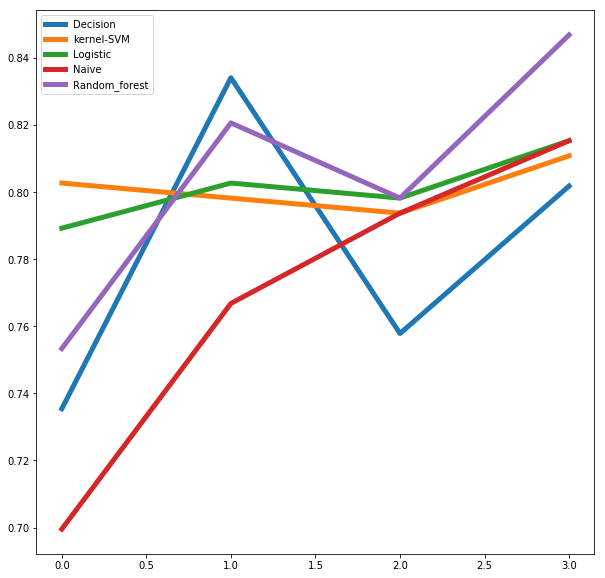

In [179]:
########## Phase 4 ##########
# This is about visualizing the result of the K-Fold Validation process

#VISUALISING THE RESULTS
df_k = pd.DataFrame(dict_K)
s =df_k.plot(figsize=(10,10),linewidth=5.0)
plt.show()

In [180]:
#Calculating the Mean of the k_fold validation
df_k.mean()

Decision         0.782289
kernel-SVM       0.801357
Logistic         0.801362
Naive            0.768851
Random_forest    0.804761
dtype: float64

In [181]:
len(y_pred)

418

In [182]:
len(y_pred)

418

In [183]:
########## 5th phase ##########
# This Final Phase is about preparing the csv file for Submition
# Preparing the CSV For Submition
p = dataset_gd.PassengerId

p = pd.concat([p,pd.DataFrame(y_pred.astype(np.int64),columns=['Survived'])],axis=1)
p


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [184]:
p.to_csv('pred.csv',index=False)
